In [1]:
# Import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
import warnings

# Figure size in inches
rcParams["figure.figsize"] = 10,6
np.random.seed(42)

/Users/olivia/anaconda3/envs/rdkit/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

In [3]:
# Show a sample of the dataset
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [4]:
# Show columns
data.columns

# There are 8 input features and 1 output target/feature 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Split the data into input and target variable(s)
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [6]:
# Standardize the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, stratify=y, test_size=0.10, random_state=42)

### Building the Random Forest Classifier

In [8]:
# Create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [9]:
# Predicition on the test set
y_pred = classifier.predict(x_test)

In [10]:
# Calculate model accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


#### Accuracy around 80.5%, which is good but can be made better

### Identify important features

In [12]:
# Check important features 
feature_importances_df = pd.DataFrame({'feature': list(x.columns), 'importance': classifier.feature_importances_}).sort_values('importance', ascending=False)

# Display
feature_importances_df

# The figure shows the relative importances of features and their contributions to the model

,feature,importance
1,Glucose,0.265153
5,BMI,0.152950
7,Age,0.142551
6,DiabetesPedigreeFunction,0.120932
2,BloodPressure,0.083460
0,Pregnancies,0.082878
4,Insulin,0.078441
3,SkinThickness,0.073634


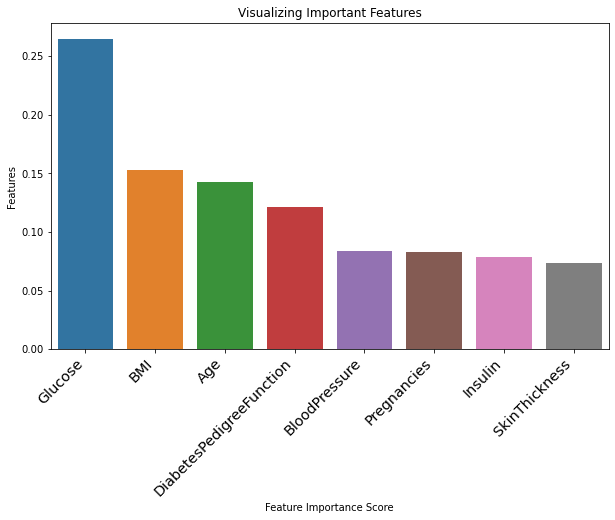

In [14]:
# Visualize important features

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

# Add labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
plt.show()

#### Remove features that do not contribute much to the prediction

In [27]:
# Load data with the selected features
x = data.drop(['Outcome', 'SkinThickness'], axis=1)
y = data["Outcome"]

# Standardize the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(feature_importances_df[data.feature_names], feature_importances_df['target'], random_state=0)


AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [20]:
# Create a random classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using training sets
clf.fit(x_train, y_train)

# Prediction on test set
y_pred = clf.predict(x_test)

# Calculate model accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8181818181818182


#### Accuracy increased after removing SkinThickness from dataset

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2,
                            random_state = 0)

clf.fit(x_train, y_train)
clf.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

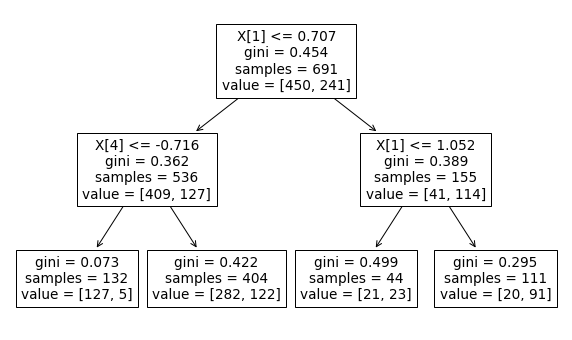

In [24]:
tree.plot_tree(clf);

IndexError: list index out of range

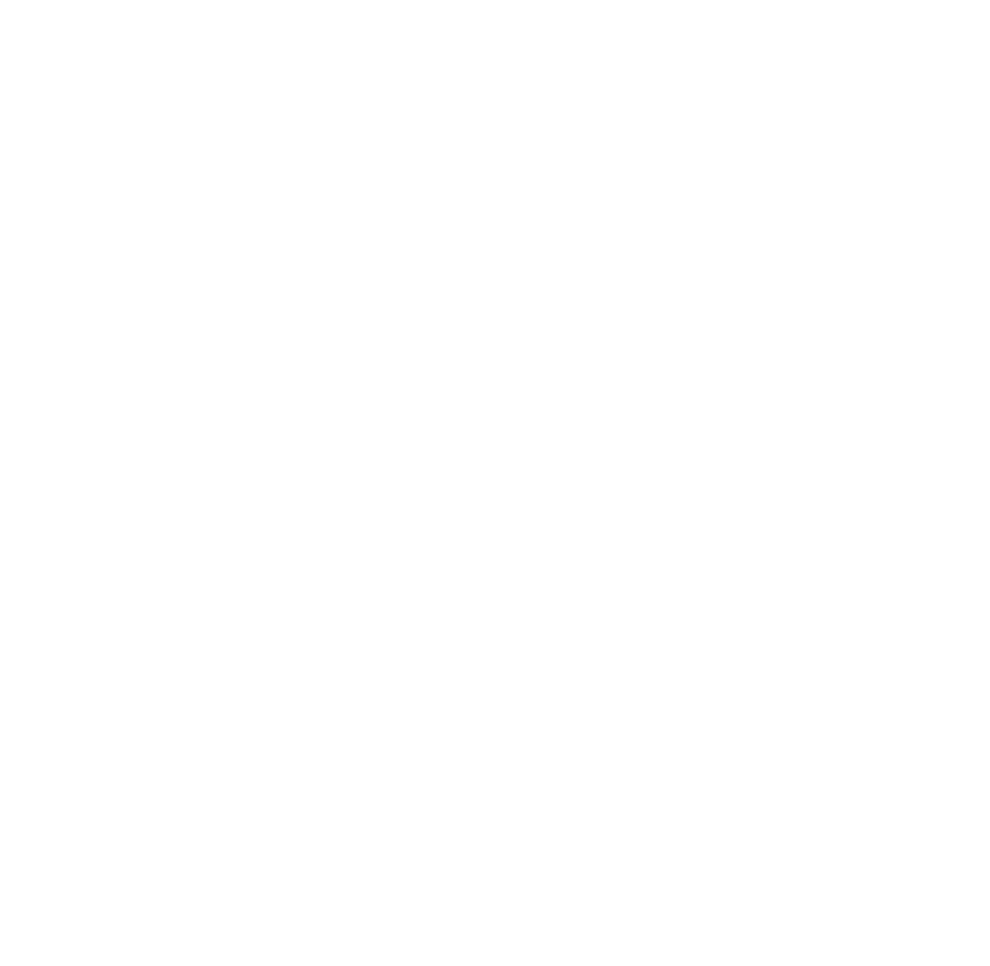

In [26]:
fn = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure', 'Pregnancies', 'Insulin']
cn = []
fig, axes = plt.subplots(nrows = 1, ncols=1, figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')